# Predicting Temperature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data=pd.read_csv(r'C:\Users\hp\Downloads\Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


# EDA AND FEATURE ENGINEERING

### Dropping rows with meaningless values

In [5]:
data[120:129]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


As we see rows 122 to 124 has meaningless values so we will drop them

In [6]:
data.drop(index=[122,123,124], inplace=True) 

In [7]:
data.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


In [8]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)
data.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


### Creating separate column for region

In [9]:
#Let Bejaia Region dataset be indicated by 0
#let Sidi-Bel Abbes Region dataset be indicated by 1

data.loc[:122,'Region']=0
data.loc[122:, 'Region']=1

data.iloc[120:].head(8)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
125,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0
126,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1.0
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1.0


In [10]:

data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [12]:
data.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244.000000
unique,31,4,1,19,62,18,39,173,166,198,106,174,126,8,NaN
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,NaN
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.501028
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [13]:
data.describe()

,Region
count,244.000000
mean,0.500000
std,0.501028
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


Since except Region every other feature has object data type so any meaningful insight for those columns aren't given by .describe()

In [14]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [15]:
null_data = data[data.isnull().any(axis=1)]
print(null_data)

    day month  year Temperature  RH  Ws Rain   FFMC   DMC      DC   ISI   BUI  \
165  14     7  2012          37  37  18   0.2  88.9  12.9  14.6 9  12.5  10.4   

         FWI Classes    Region  
165  fire          NaN     1.0  


Index 168 has nan value so we replace with fire and fire value with mean of all the values in 'FWI'

In [16]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [17]:
# stripping spaces from column names so that 'Classes' can be updated
data.columns= [col_name.strip() for col_name in data.columns]
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [18]:
#reolacing fire with meean value 0.2
data.loc[168,'FWI']='0.2'

In [19]:
# replacing nan value wit fire to make data equal to the info given in dataset 
data.loc[168,'Classes']='fire'

In [20]:
data.loc[168]

day              17
month             7
year           2012
Temperature      32
RH               81
Ws               17
Rain              0
FFMC           84.6
DMC            21.1
DC             42.3
ISI             4.7
BUI            20.9
FWI             0.2
Classes        fire
Region          1.0
Name: 168, dtype: object

In [21]:

#removing unnecessary spaces in the 'Classes' column
data.Classes=data.Classes.str.strip()
data.Classes.unique()

array(['not fire', 'fire', nan], dtype=object)

### Encoding Classes

In [22]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [23]:
data['Classes']=np.where(data['Classes']=='not fire',0,1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0.0


In [24]:
data.Classes.unique

<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int32>

### Changing datatypes

In [25]:
data['day']=data['day'].astype(int)
data['month']=data['month'].astype(int)
data['year']=data['year'].astype(int)
data['Temperature']=data['Temperature'].astype(int)
data['RH']=data['RH'].astype(int)
data['Rain']=data['Rain'].astype(float)
data['FFMC']=data['FFMC'].astype(float)
data['DMC']=data['DMC'].astype(float)
data['BUI']=data['BUI'].astype(float)
data['ISI']=data['ISI'].astype(float)
data['Ws']=data['Ws'].astype(float)




data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    int32  
 14  Region       244 non-null    float64
dtypes: float64(7), int32(6), object(2)
memory usage: 23.0+ KB


In [26]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0,0.0
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


### Applying Label encoding in DC,FWI,region features

In [29]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
data['DC']=LabelEncoder.fit_transform(data['DC'])
data['FWI']=LabelEncoder.fit_transform(data['FWI'])
data['Region']=LabelEncoder.fit_transform(data['Region'])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    int64  
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    int64  
 13  Classes      244 non-null    int32  
 14  Region       244 non-null    int64  
dtypes: float64(6), int32(6), int64(3)
memory usage: 23.0 KB


In [31]:
data.drop(['year'],axis=1) #as year has same value

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18.0,0.0,65.7,3.4,150,1.3,3.4,5,0,0
1,2,6,29,61,13.0,1.3,64.4,4.1,150,1.0,3.9,4,0,0
2,3,6,26,82,22.0,13.1,47.1,2.5,146,0.3,2.7,1,0,0
3,4,6,25,89,13.0,2.5,28.6,1.3,136,0.0,1.7,0,0,0
4,5,6,27,77,16.0,0.0,64.8,3.0,18,1.2,3.9,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14.0,0.0,85.4,16.0,112,4.5,16.9,106,1,1
240,27,9,28,87,15.0,4.4,41.1,6.5,164,0.1,6.2,0,0,1
241,28,9,27,87,29.0,0.5,45.9,3.5,153,0.4,3.4,2,0,1
242,29,9,24,54,18.0,0.1,79.7,4.3,25,1.7,5.1,7,0,1


In [32]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,103.639344,4.774180,16.664754,47.602459,0.565574,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,57.469200,4.175318,14.204824,41.138851,0.496700,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,52.750000,1.400000,6.000000,7.000000,0.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,107.500000,3.500000,12.250000,40.500000,1.000000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,153.250000,7.300000,22.525000,85.250000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,197.000000,19.000000,68.000000,125.000000,1.000000,1.000000


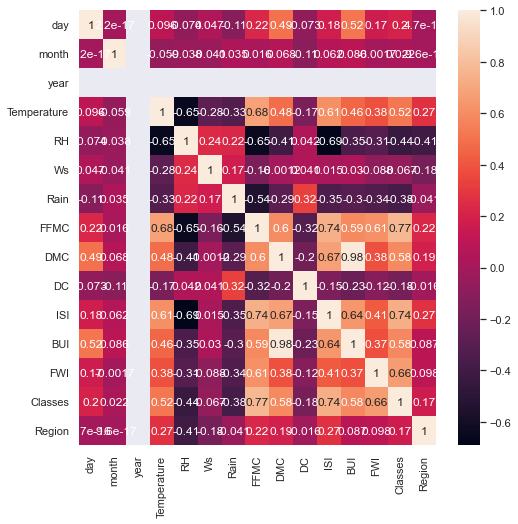

In [148]:
sns.heatmap(data.corr(),annot=True)
sns.set(rc={'figure.figsize':(20,20)})

Since we are trying to predict the temperature,we saw that FFMC(Fine Fuel Moisture Code) has the highest correlation compared to other features so-

### Finding best fit line

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

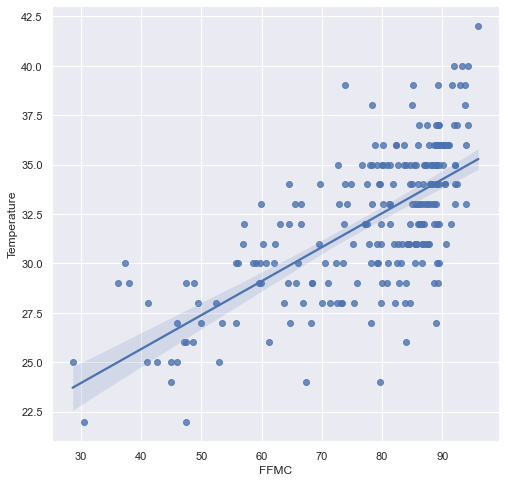

In [38]:
sns.set(rc={'figure.figsize':(8,8)})
sns.regplot(x="FFMC",y="Temperature",data=data)

### Creating independent and dependent features

In [39]:
#creating independent feature

y=data['Temperature']


In [40]:
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int32

In [41]:
X=data.drop('Temperature',axis=1)

In [42]:
X.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,57,18.0,0.0,65.7,3.4,150,1.3,3.4,5,0,0
1,2,6,2012,61,13.0,1.3,64.4,4.1,150,1.0,3.9,4,0,0
2,3,6,2012,82,22.0,13.1,47.1,2.5,146,0.3,2.7,1,0,0
3,4,6,2012,89,13.0,2.5,28.6,1.3,136,0.0,1.7,0,0,0
4,5,6,2012,77,16.0,0.0,64.8,3.0,18,1.2,3.9,5,0,0


### Splitting into train and test data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)   

### Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler=StandardScaler()

In [47]:
X_train=scaler.fit_transform(X_train)

In [48]:
X_test=scaler.transform(X_test)      

# LINEAR REGRESSION

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
regression=LinearRegression()

In [52]:
regression.fit(X_train,y_train)

LinearRegression()

In [53]:
print(regression.coef_)

[-6.08413228e-01 -2.93923084e-01 -4.44089210e-16 -9.97885373e-01
 -5.46464145e-01  2.15782803e-01  1.72063855e+00 -4.18928712e-01
 -1.10360305e-01  2.05430414e-01  1.19142998e+00  2.57505601e-01
 -4.19960857e-01  5.00686113e-02]


In [54]:
print(regression.intercept_)  

31.98159509202454


In [55]:
#predicting test data
reg_pred=regression.predict(X_test)

In [57]:
 reg_pred

array([32.96913755, 35.11293831, 34.89247672, 32.65291809, 36.27395825,
       32.27381312, 34.94158121, 28.36427772, 31.68871188, 29.16577535,
       29.06403172, 33.34933102, 32.56047803, 32.81129314, 34.4332992 ,
       32.02763001, 36.8596234 , 25.31884109, 32.87256087, 33.47860041,
       31.52105311, 28.19400158, 34.5137781 , 29.18808958, 37.13026165,
       25.10631926, 33.49427599, 33.01883243, 33.36939516, 35.03339784,
       33.99412523, 31.64707545, 31.85556082, 33.05288764, 32.48451452,
       31.51075226, 30.10897849, 34.32617754, 32.07514761, 21.86866154,
       33.65603361, 34.7567669 , 31.63324117, 24.7366362 , 35.82153018,
       32.99827139, 30.81531368, 30.66526402, 34.76822999, 34.52648753,
       37.30921175, 30.53652597, 31.38979009, 34.81782713, 32.86254731,
       32.43428963, 36.96467954, 30.66297575, 30.75526015, 35.82375319,
       34.12600121, 28.67383363, 32.79604695, 31.83340016, 32.31076079,
       24.23082046, 33.62935818, 29.94880112, 37.07112185, 35.07

### ASSUMPTIONS OF LINEAR REGRESSION

Text(0, 0.5, 'Test predicted data')

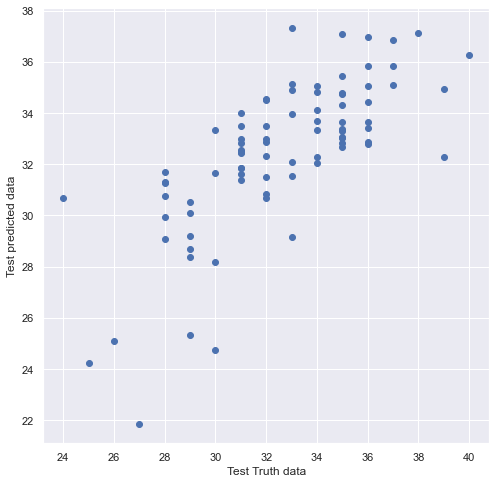

In [61]:
plt.scatter(y_test,reg_pred)
plt.xlabel('Test Truth data')
plt.ylabel('Test predicted data')

In [62]:
#residual
residuals=y_test-reg_pred

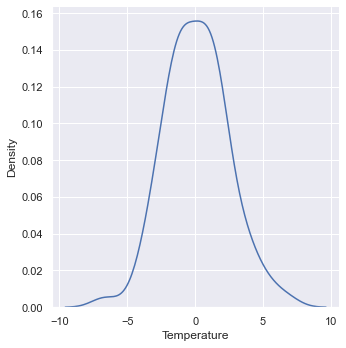

In [63]:
sns.displot(residuals,kind='kde')

We got a normal distribution for residuals so model is good

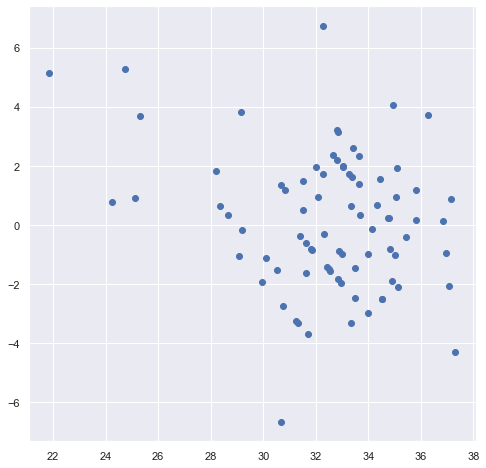

In [65]:
#Scatter plot with predictions and residuals 
#Uniform distribution
plt.scatter(reg_pred,residuals)

 No shape hence it is a uniform distribution,model is good

### Performance Metrics 

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("The mean squared error is {}".format(mean_squared_error(y_test,reg_pred)))
print("The mean absolute error is {}".format(mean_absolute_error(y_test,reg_pred)))
print("The  root mean squared error is {}".format(np.sqrt(mean_squared_error(y_test,reg_pred))))

The mean squared error is 5.391308442562103
The mean absolute error is 1.8490926653949966
The  root mean squared error is 2.3219191292037076


In [68]:
from sklearn.metrics import r2_score
print("The r2 square value is {}".format(r2_score(y_test,reg_pred)))

The r2 square value is 0.4980505932787008


In [72]:
score=r2_score(y_test,reg_pred)

In [74]:
#Adjusted r square
adjusted_r2_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("The adjusted r2 square value is {}".format(adjusted_r2_score))

The adjusted r2 square value is 0.39157647670145557


# RIDGE REGRESSION

In [75]:
from sklearn.linear_model import Ridge

In [118]:
rdg =Ridge(alpha = 10.0)

In [119]:
rdg.fit(X_train,y_train)

Ridge(alpha=10.0)

In [120]:
rdg_pred=rdg.predict(X_test)

In [121]:
rdg_pred

array([32.93986263, 35.01165197, 34.86189582, 32.6463705 , 36.10941385,
       32.18485613, 34.9725097 , 28.46057584, 31.33907154, 29.19221302,
       29.13216876, 32.84718938, 32.49790024, 32.68269962, 34.32421492,
       32.22720661, 36.85651939, 25.97011439, 32.82808861, 33.61733431,
       31.21481547, 28.42374478, 34.53700232, 29.25436571, 37.02796051,
       25.75872116, 33.37797393, 32.84185693, 33.16258737, 35.00708609,
       33.99451327, 31.32779837, 31.93100146, 33.04247383, 32.36267866,
       31.5245547 , 29.9445825 , 34.32169827, 31.52973209, 22.81037899,
       33.46809024, 34.64224726, 31.58843431, 25.43328776, 35.79819311,
       32.97838435, 31.00271115, 30.5792364 , 34.83812808, 34.47082439,
       37.51233958, 30.67590149, 31.55334157, 34.60502013, 32.76648438,
       32.3179413 , 37.09270244, 30.72493029, 30.60557885, 35.76519302,
       34.07655043, 29.02086709, 33.03108592, 31.91209957, 32.04186413,
       24.75773377, 33.56496521, 30.1430132 , 37.17233004, 35.37

In [122]:
print("R2 SCORE - {}".format(r2_score(y_test,rdg_pred)))
print("The mean squared error is {}".format(mean_squared_error(y_test,rdg_pred)))
print("The mean absolute error is {}".format(mean_absolute_error(y_test,rdg_pred)))
print("The  root mean squared error is {}".format(np.sqrt(mean_squared_error(y_test,rdg_pred))))
adjusted_r2_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("The adjusted r2 square value is {}".format(adjusted_r2_score))

R2 SCORE - 0.5224711312775985
The mean squared error is 5.129013775166536
The mean absolute error is 1.802003109443558
The  root mean squared error is 2.264732605665962
The adjusted r2 square value is 0.39157647670145557


Using Ridge Regression,keeping alpha-10.0
We just got an R2 Score of 52 instead of 49

So accuracy improve only for a small value

# LASSO REGRESSION

In [110]:
from sklearn.linear_model import Lasso


In [147]:
alpha = [0,0.1,0.2,0.3,0.4,0.5]
for i in alpha:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    l_pred=L.predict(X_test)
    print("R2 SCORE - {}".format(r2_score(y_test,rdg_pred)))
    print("The mean squared error for {} is {}".format(i,mean_squared_error(y_test,l_pred)))
    print("The mean absolute error for {} is {}".format(i,mean_absolute_error(y_test,l_pred)))
    print("The  root mean squared error for {} is {}".format(i,np.sqrt(mean_squared_error(y_test,l_pred))))
    adjusted_r2_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print("The adjusted r2 square value for {} is {}".format(i,adjusted_r2_score))

R2 SCORE - 0.5224711312775985
The mean squared error for 0 is 5.391308442566746
The mean absolute error for 0 is 1.8490926653994473
The  root mean squared error for 0 is 2.321919129204707
The adjusted r2 square value for 0 is 0.39157647670145557
R2 SCORE - 0.5224711312775985
The mean squared error for 0.1 is 5.09560183240264
The mean absolute error for 0.1 is 1.8119265461232814
The  root mean squared error for 0.1 is 2.2573439774218373
The adjusted r2 square value for 0.1 is 0.39157647670145557
R2 SCORE - 0.5224711312775985
The mean squared error for 0.2 is 5.197235330908262
The mean absolute error for 0.2 is 1.8386785208297516
The  root mean squared error for 0.2 is 2.27974457580411
The adjusted r2 square value for 0.2 is 0.39157647670145557
R2 SCORE - 0.5224711312775985
The mean squared error for 0.3 is 5.284543002010997
The mean absolute error for 0.3 is 1.850592151162273
The  root mean squared error for 0.3 is 2.2988133899929757
The adjusted r2 square value for 0.3 is 0.39157647670

C:\Users\hp\AppData\Local\Temp\ipykernel_10316\2373614076.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  L.fit(X_train,y_train)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.682e+02, tolerance: 2.321e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Hence,Changing value of alpha did not make any significant change in accuracy of the model 

# ELASTICNET

In [135]:
from sklearn.linear_model import ElasticNet

In [146]:
alpha = [0,0.1,0.11,0.12,0.13,0.2,0.3,0.5,0.9,1.0]
for i in alpha:
    e= ElasticNet(alpha=i)
    e.fit(X_train,y_train)
    e_pred=e.predict(X_test)
    print("R2 SCORE - {}".format(r2_score(y_test,e_pred)))
    print("The mean squared error for {} is {}".format(i,mean_squared_error(y_test,e_pred)))
    print("The mean absolute error for {} is {}".format(i,mean_absolute_error(y_test,e_pred)))
    print("The  root mean squared error for {} is {}".format(i,np.sqrt(mean_squared_error(y_test,e_pred))))
    adjusted_r2_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print("The adjusted r2 square value for {} is {}".format(i,adjusted_r2_score))

R2 SCORE - 0.4980505932782685
The mean squared error for 0 is 5.391308442566746
The mean absolute error for 0 is 1.8490926653994473
The  root mean squared error for 0 is 2.321919129204707
The adjusted r2 square value for 0 is 0.39157647670145557
R2 SCORE - 0.532879723284448
The mean squared error for 0.1 is 5.017217786944818
The mean absolute error for 0.1 is 1.7872412646628446
The  root mean squared error for 0.1 is 2.2399146829611207
The adjusted r2 square value for 0.1 is 0.39157647670145557
R2 SCORE - 0.5341058186226786
The mean squared error for 0.11 is 5.0040486147934535
The mean absolute error for 0.11 is 1.7870251526876455
The  root mean squared error for 0.11 is 2.2369730921031334
The adjusted r2 square value for 0.11 is 0.39157647670145557
R2 SCORE - 0.535230683380572
The mean squared error for 0.12 is 4.991966734060524
The mean absolute error for 0.12 is 1.7868258371490526
The  root mean squared error for 0.12 is 2.2342709625424853
The adjusted r2 square value for 0.12 is 0.

C:\Users\hp\AppData\Local\Temp\ipykernel_10316\3854843591.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  e.fit(X_train,y_train)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.682e+02, tolerance: 2.321e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


### Here, making alpha value in ElasticNet to 0.3 makes the accuracy to 54.168 which is the highest value of accuracy we have seen so far